In [7]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Print dataset shapes
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [11]:
def build_and_train_model(hidden_layers=1, 
                          activation="relu", 
                          optimizer="adam", 
                          epochs=5):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    
    # Add hidden layers
    for _ in range(hidden_layers):
        model.add(Dense(128, activation=activation))
    
    # Output layer → 10 classes
    model.add(Dense(10, activation="softmax"))
    
    # Compile model
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    # Train
    history = model.fit(
        x_train, y_train,
        validation_split=0.1,
        epochs=15,
        batch_size=32,
        verbose=1
    )
    # Evaluate
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test accuracy: {test_acc:.4f}")
    
    return history, test_acc


In [12]:
history_relu, acc_relu = build_and_train_model(activation="relu", optimizer="adam")
history_sigmoid, acc_sigmoid = build_and_train_model(activation="sigmoid", optimizer="adam")


Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9222 - loss: 0.2755 - val_accuracy: 0.9613 - val_loss: 0.1394
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9639 - loss: 0.1219 - val_accuracy: 0.9723 - val_loss: 0.0987
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9749 - loss: 0.0834 - val_accuracy: 0.9765 - val_loss: 0.0874
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9808 - loss: 0.0620 - val_accuracy: 0.9737 - val_loss: 0.0850
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9854 - loss: 0.0470 - val_accuracy: 0.9753 - val_loss: 0.0808
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9878 - loss: 0.0383 - val_accuracy: 0.9757 - val_loss: 0.0848
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9907 - loss: 0.0292 - val_accuracy: 0.9748 - val_loss: 0.0948
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9927 -

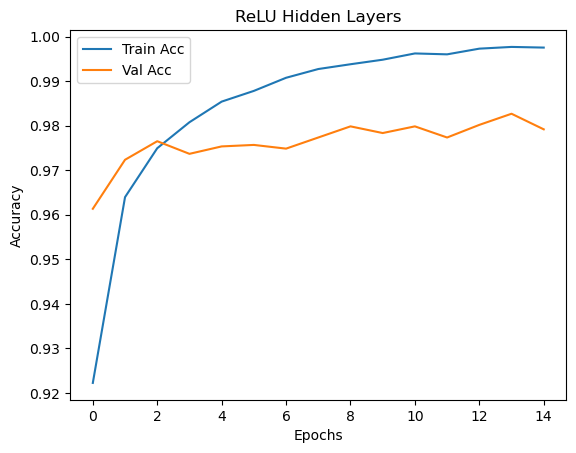

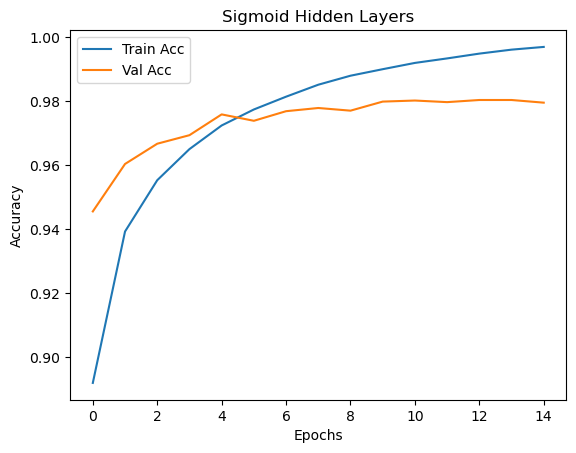

In [14]:
def plot_history(history, title=""):
    plt.plot(history.history['accuracy'], label="Train Acc")
    plt.plot(history.history['val_accuracy'], label="Val Acc")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

# Example
plot_history(history_relu, title="ReLU Hidden Layers")
plot_history(history_sigmoid, title="Sigmoid Hidden Layers")


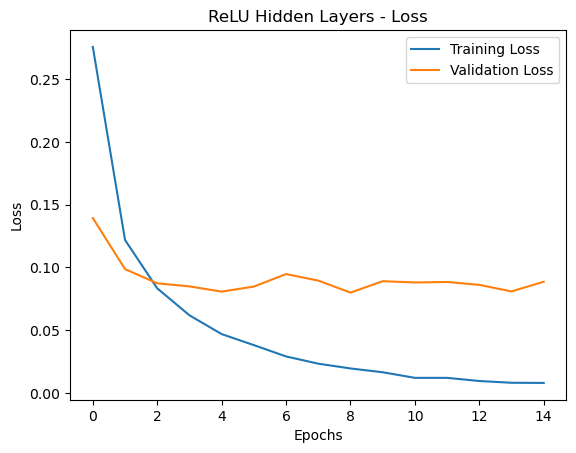

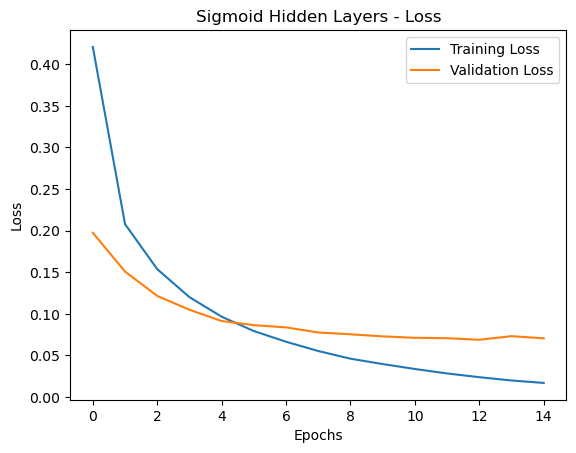

In [15]:
import matplotlib.pyplot as plt

def plot_loss(history, title="Loss Curve"):
    plt.plot(history.history['loss'], label="Training Loss")
    plt.plot(history.history['val_loss'], label="Validation Loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

# Example usage:
plot_loss(history_relu, title="ReLU Hidden Layers - Loss")
plot_loss(history_sigmoid, title="Sigmoid Hidden Layers - Loss")


## chouse the best epoch :
#### accourding to the change in the val_loss when it start increas ok become constant so its good